In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math
from eval_functions import isValid, get_depth, calc_errors

In [2]:
path_1 = "C:\\Users\\Ben\\OneDrive - Bournemouth University\\Computer Vision\\Datasets\\Kitti\\depth_selection\\val_selection_cropped\\groundtruth_depth\\2011_09_26_drive_0002_sync_groundtruth_depth_0000000005_image_02.png"
path_2 = "C:\\Users\\Ben\\OneDrive - Bournemouth University\\Computer Vision\Datasets\\Kitti\\depth_selection\\val_selection_cropped\\groundtruth_depth\\2011_09_26_drive_0002_sync_groundtruth_depth_0000000008_image_03.png"

In [3]:
def depth_read(filename):
    # loads depth map D from png file
    # and returns it as a numpy array,
    # for details see readme.txt

    depth_png = np.array(Image.open(filename), dtype=int)
    # make sure we have a proper 16bit depth map here.. not 8bit!
    assert(np.max(depth_png) > 255)

    depth = depth_png.astype(np.float) / 256.
    depth[depth_png == 0] = -1.
    return depth

In [4]:
def show_depth_image(image, size=(18,32)):
    plt.figure(figsize = size) ## make the figure larger or smaller, keep the aspect ratio (9:16) the same
    plt.imshow(image, interpolation='nearest')
    plt.axis("off")

In [5]:
depth_test = depth_read(path_1)
depth_compare = depth_read(path_2)

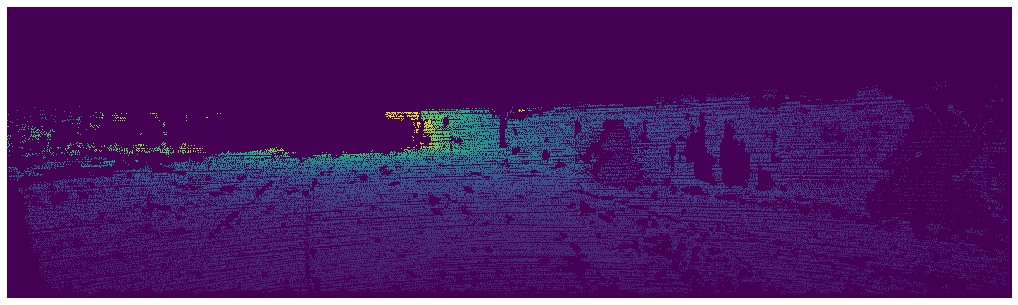

In [6]:
show_depth_image(depth_test)

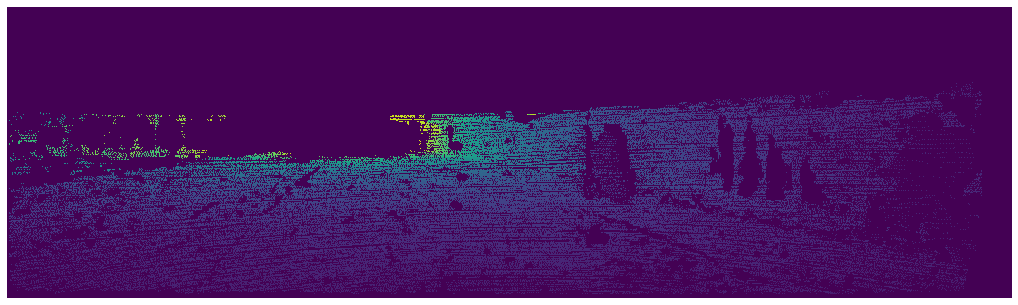

In [7]:
show_depth_image(depth_compare)

In [8]:
depth_compare.shape

(352, 1216)

### retrieve image dimensions

In [9]:
depth_test.shape

(352, 1216)

In [10]:
depth_test.shape[0]

352

In [11]:
# def get_depth(depth_img,u,v):
#     return depth_img[u][v]

In [12]:
# def isValid(depth_1, depth_2):
#     return (depth_1>0 and depth_2>0)

In [13]:
get_depth(depth_test,0,0) 

-1.0

In [14]:
# def calc_errors(pred_depth, grndt_depth):
#     if (pred_depth.shape[0] == grndt_depth.shape[0] and pred_depth.shape[1] == grndt_depth.shape[1]):
#         difference_err = 0  # 1
#         sqr_diff_err = 0    # 2
#         inv_err = 0         # 3
#         inv_sqr_err = 0     # 4
#         log_err = 0         # 5
#         log_sqr_err = 0     # 6
#         log_non_abs_err = 0 # 7
#         abs_rel_err = 0     # 8
#         sqr_rel_err = 0     # 9
#         valid_pixels = 0   # valid pixel count
#         for u in range(0, pred_depth.shape[0]):
#             for v in range(0, pred_depth.shape[1]):
#                 # grabbing the depths at point (u,v) from the depth maps
#                 depth_of_pred = get_depth(pred_depth,u,v)
#                 depth_of_gt = get_depth(grndt_depth,u,v)
#                 if isValid(depth_of_pred,depth_of_gt):          # check non negative depth

#                     # calculate the absolute difference between depth maps for a given pixel
#                     diff = abs(depth_of_gt-depth_of_pred)                               
#                     # squared difference
#                     sqr = diff*diff                                                     
#                     # absolute inverse difference
#                     inv = abs(1/depth_of_gt-1/depth_of_pred)                           
#                     # squared inverse difference
#                     inv_sqr = inv*inv
#                     # absolute log difference
#                     log_diff_abs = abs(math.log(depth_of_gt)-math.log(depth_of_pred))   
#                     # absolute log square difference
#                     log_sqr = log_diff_abs*log_diff_abs                                 
#                     # log difference (non absolute)
#                     log_diff = math.log(depth_of_gt) - math.log(depth_of_pred)




#                     difference_err += diff                      # increment difference error                                      # 1
#                     sqr_diff_err += sqr                         # increment square difference error                               # 2
#                     inv_err += inv                              # increment inverse difference error                              # 3
#                     inv_sqr_err += inv_sqr                      # increment inverse square difference error                       # 4
#                     log_err += log_diff_abs                     # increment absolute log error                                    # 5         
#                     log_sqr_err += log_sqr                      # increment absolute square log error                             # 6   
#                     log_non_abs_err += log_diff                 # increment log difference error (for scale invariant log error)  # 7    
#                     abs_rel_err += diff/depth_of_gt             # increment absolute relative error                               # 8       
#                     sqr_rel_err += sqr/(depth_of_gt*depth_of_gt) # increment square relative error                       # 9

#                     valid_pixels += 1                           # increment number of valid pixels




#         # Normalisation
#         # normalising to give mean average error (mae)
#         difference_err = difference_err/valid_pixels
#         # norm and sqrt for root mean square error (rmse)
#         sqr_diff_err = sqr_diff_err/valid_pixels
#         sqr_diff_err = math.sqrt(sqr_diff_err)
#         # norm inverse abs error (iae)
#         inv_err = inv_err/valid_pixels
#         # norm and sqrt for inverse rmse (irmse)
#         inv_sqr_err = inv_sqr_err/valid_pixels
#         inv_sqr_err = math.sqrt(inv_sqr_err)
#         # norm log mean absolute error
#         log_err = log_err/valid_pixels
#         # save normed square log error as it is required for scale invariant error
#         norm_sqr_log = log_sqr_err/valid_pixels
#         # sqrt to give log rmse
#         log_sqr_err = math.sqrt(norm_sqr_log)
#         # scale invariant error
#         scale_inv_err = math.sqrt(norm_sqr_log - (log_non_abs_err*log_non_abs_err)/(valid_pixels*valid_pixels))
#         # norm absolute relative error
#         abs_rel_err = abs_rel_err/valid_pixels
#         # norm relative square error
#         sqr_rel_err = sqr_rel_err/valid_pixels

#     else:
#         print("Depth maps do not have the same dimensions!")
#     return [difference_err, sqr_diff_err, inv_err, inv_sqr_err, log_err, log_sqr_err, scale_inv_err, abs_rel_err, sqr_rel_err]

In [26]:
fake_depth = np.ones([1,352,1216])

In [27]:
fake_depth.shape

(1, 352, 1216)

In [28]:
%%time
calc_errors(depth_test, fake_depth[0])

Wall time: 842 ms


[14.930006543018932,
 18.83855340214229,
 0.9142782791891236,
 0.9151249042221828,
 2.5893574854383705,
 2.6487208579867714,
 0.5576289054007673,
 14.930006543018932,
 354.89109428536676]